No traceback available to show.
C:\Users\present\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


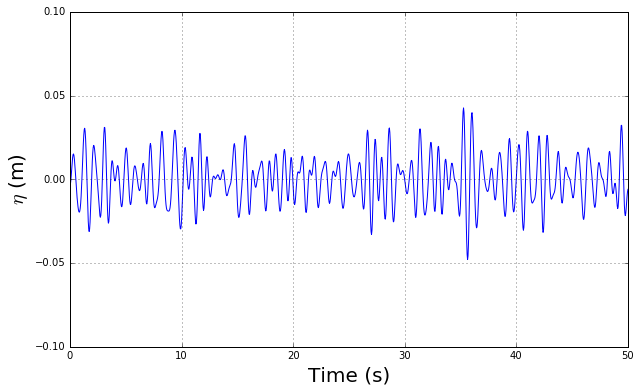

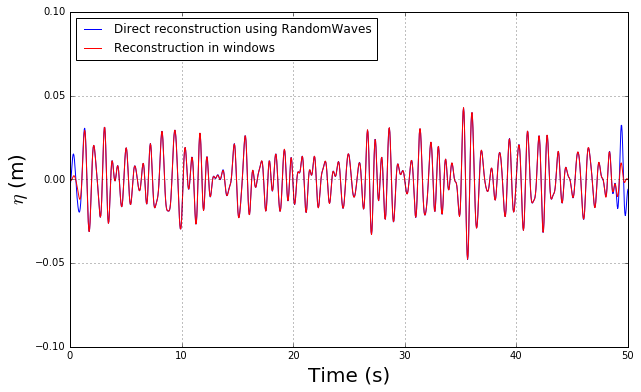

('Time for Random Wave class:', 22.61724839655533)
('Time for Timeseries class:', 1.1185386082894482)


In [1]:
%matplotlib inline
%tb
from matplotlib import pyplot as plt
import numpy as np
import sys
#Append path of local proteus installation
sys.path.append("C:/Users/present/Desktop/proteus/")
#The notebook will work with the following commit:
#https://github.com/erdc-cm/proteus/commit/9bb34b3563b5ddab6cb1dd9f75173da2710d2a41
from proteus import Profiling,SpatialTools
import imp
WT = imp.load_source('WaveTools', 'WaveTools.pyx')
import time


Tp = 1.
Hs = 0.062
mwl = 0.47
depth = 0.47
g = np.array([0., -9.81, 0])
N = 2001
bandFactor = 2.0
spectName = "PM_mod"
spectral_params = None
phi = None
waveDir = np.array([1., 0., 0.])


#Calling the class
RW = WT.RandomWaves(Tp,
                 Hs,
                 mwl,
                 depth,
                 waveDir,
                 g,
                 N,
                 bandFactor,
                 spectName,
                 spectral_params,
                 phi
                )

nperiod = 50
npoints = 25
n = npoints * nperiod
tnlist=np.linspace(0,nperiod*Tp,n)
eta_t = np.zeros(len(tnlist),)

x = np.array([0., 0., 0.])

#Calculating time series
t1  =-time.clock()
for i in range(len(tnlist)):
    t = tnlist[i]
    eta_t[i] = RW.eta(x, t)
t1 = t1 + time.clock()
    
psize = 20    
plt.figure(4, figsize=(10,6), dpi=100)
plt.plot(tnlist, eta_t, color='blue')
plt.xlabel("Time (s)", size=psize)
plt.ylabel("$\eta$ (m)", size=psize)
plt.ylim(-0.1,0.1)
plt.legend(loc='upper left')
plt.grid()
plt.show()

np.savetxt("MaseKirbySeries.txt",zip(tnlist,eta_t))


#Setting up wave properties
timeSeriesFile="MaseKirbySeries.txt"
skiprows=0
N=32
rec_direct=False
window_params=None
timeSeriesPosition=[0., 0., 0.]




#Calling the class
TS = WT.TimeSeries(timeSeriesFile,
                skiprows,
                timeSeriesPosition,
                depth,
                N,
                mwl,
                waveDir,
                g,
                cutoffTotal = 2./1000.,
                rec_direct=False,
                window_params = {"Nwaves":15,"Tm":Tp/1.1,"Window":"costap"}
                )


#Setting up a time interval of n periods (using npoints sampling points per period)
eta_ts = np.zeros(len(tnlist),)
uVel_ts = np.zeros(len(tnlist),)


#Calculating time series
t2 = -time.clock()
for i in range(len(tnlist)):
    t = tnlist[i]
    eta_ts[i] = TS.eta(x, t)
t2 = t2 +  time.clock()

#Plotting both time series from time series file and wave class
plt.figure(1, figsize=(10,6), dpi=100)
plt.plot(tnlist, eta_t, color='blue', label="Direct reconstruction using RandomWaves")
plt.plot(tnlist, eta_ts, color='red', label="Reconstruction in windows")
plt.xlabel("Time (s)", size=psize)
plt.ylabel("$\eta$ (m)", size=psize)
plt.ylim(-0.1,0.1)
plt.legend(loc='upper left')
plt.grid()
plt.show()


print ("Time for Random Wave class:",t1)
print ("Time for Timeseries class:",t2)